In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import datetime
import scipy.stats as stats

In [3]:
data_url = "https://catalog.data.gov/dataset/lottery-mega-millions-winning-numbers-beginning-2002"
wiki_url = "https://en.wikipedia.org/wiki/Mega_Millions"
csv_file = "Lottery_Mega_Millions_Winning_Numbers__Beginning_2002.csv"

df = pd.read_csv(csv_file)

df["Draw Date"] = pd.to_datetime(df["Draw Date"] )
df = df[df['Draw Date'] > "2017-10-30"]  # October 2017 format and price change - first draw on 10/31/2017

df.head()

df["Winning_Number_Split"] = df["Winning Numbers"].str.split(" ")
df["w_1"] = df["Winning_Number_Split"].str.get(0).astype(int)
df["w_2"] = df["Winning_Number_Split"].str.get(1).astype(int)
df["w_3"] = df["Winning_Number_Split"].str.get(2).astype(int)
df["w_4"] = df["Winning_Number_Split"].str.get(3).astype(int)
df["w_5"] = df["Winning_Number_Split"].str.get(4).astype(int)
df.describe()

,Mega Ball,Multiplier,w_1,w_2,w_3,w_4,w_5
count,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000
mean,12.883978,2.983425,10.602210,23.325967,35.635359,47.613260,59.309392
std,7.092470,0.884905,8.929153,11.836799,12.982881,13.043715,9.872710
min,1.000000,2.000000,1.000000,2.000000,4.000000,8.000000,18.000000
25%,7.000000,2.000000,3.000000,14.000000,27.000000,40.000000,55.000000
50%,12.000000,3.000000,8.000000,23.000000,36.000000,48.000000,62.000000
75%,19.000000,4.000000,15.000000,32.000000,44.000000,59.000000,67.000000
max,25.000000,5.000000,40.000000,59.000000,66.000000,68.000000,70.000000


In [5]:
balls = list(range(1,71))  # valid ball draws are 1-70
megas = list(range(1,26))  # valid mega ball draws are 1-25

ball_draws = [df["w_1"],df["w_2"],df["w_3"],df["w_4"],df["w_5"]]
pdf_norm = []
pdf_gamma = []
pdf_beta = []
pdf_skew = []
pdf_lognorm = []
pdf_uniform = []
pdf_expon = []

for d_idx in range(0,5):
    data = ball_draws[d_idx]
    mu, sigma = stats.norm.fit(data)
    pdf_norm.append(stats.norm.pdf(balls, mu, sigma))
    
    ag,bg,cg = stats.gamma.fit(data)  
    pdf_gamma.append(stats.gamma.pdf(balls, ag, bg,cg))

    ab,bb,cb,db = stats.beta.fit(data)  
    pdf_beta.append(stats.beta.pdf(balls, ab, bb,cb, db))
    
    ae, loce, scalee = stats.skewnorm.fit(data)
    pdf_skew.append(stats.skewnorm.pdf(balls,ae, loce, scalee))
    
    shape, loc, scale = stats.lognorm.fit(data, floc=0)
    pdf_lognorm.append(stats.lognorm.pdf(balls, shape, loc, scale))
    
    pdf_uniform.append(1.0 / (max(balls)-min(balls))*np.ones(len(balls)))
    
    locx, scalex = stats.expon.fit(data)
    pdf_expon.append(stats.expon.pdf(balls, loc=locx, scale=scalex))

data = df["Mega Ball"]
mu, sigma = stats.norm.fit(data)
pdf_norm.append(stats.norm.pdf(megas, mu, sigma))
ag,bg,cg = stats.gamma.fit(data)  
pdf_gamma.append(stats.gamma.pdf(megas, ag, bg,cg))
ab,bb,cb,db = stats.beta.fit(data)  
pdf_beta.append(stats.beta.pdf(megas, ab, bb,cb, db))
ae, loce, scalee = stats.skewnorm.fit(data)
pdf_skew.append(stats.skewnorm.pdf(megas,ae, loce, scalee))
shape, loc, scale = stats.lognorm.fit(data, floc=0)
pdf_lognorm.append(stats.lognorm.pdf(megas, shape, loc, scale))
pdf_uniform.append(1.0 / (max(megas)-min(megas))*np.ones(len(megas)))
locx, scalex = stats.expon.fit(data)
pdf_expon.append(stats.expon.pdf(megas, loc=locx, scale=scalex))

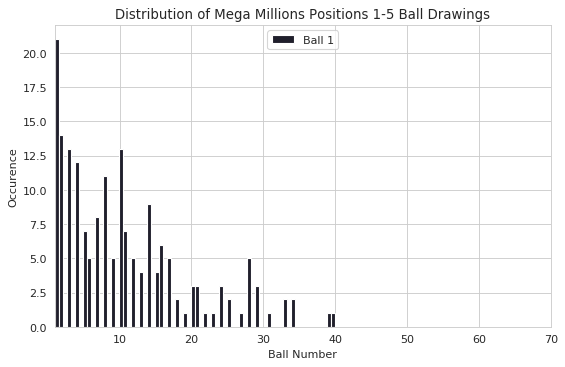

In [9]:
fig=plt.figure(figsize=(8, 5), dpi= 80, facecolor='w', edgecolor='k')
sns.set_style("whitegrid")
sns.set_palette("bone")
plt.hist(df["w_1"].values.tolist(), bins=70, label="Ball 1")
#plt.hist(df["w_2"].values.tolist(), bins=70, label="Ball 2")
#plt.hist(df["w_3"].values.tolist(), bins=70, label="Ball 3")
#plt.hist(df["w_4"].values.tolist(), bins=70, label="Ball 4")
#plt.hist(df["w_5"].values.tolist(), bins=70, label="Ball 5")
plt.xlabel("Ball Number")
plt.ylabel("Occurence")
plt.title("Distribution of Mega Millions Positions 1-5 Ball Drawings")
plt.xlim((1, 70))
#plt.ylim((0, 0.055))
plt.legend(loc="upper center")
plt.show()

In [19]:
df["w_1"]==1

0       True
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29      True
       ...  
151    False
152    False
153     True
154    False
155    False
156    False
157    False
158    False
159    False
160    False
161    False
162     True
163    False
164    False
165     True
166    False
167    False
168    False
169    False
170    False
171    False
172    False
173    False
174    False
175    False
176     True
177    False
178     True
179    False
180    False
Name: w_1, Length: 181, dtype: bool